# <img style="float: left; padding-right: 10px; width: 150px" src="../../imagini/unitbv2.png"> SIIPA2020- Știința Explorării și Exploatării Datelor - ADS1  






## <center>Curs 8 - Regresie Liniara Multiplă: exemple</center>
**Universitatea Transilvania**<br>
**Semestrul I, 2020-2021**<br>
**Instructor:** Conf. univ. dr. Teodor &Scedil;tefan B&icirc;ldea<br>
**Contact:** teodor.bildea@unitbv.ro<br>


# Cuprins notebook

## Recapitulare regresie simplă

- Model OLS (<b>O</b>rdinary <b>L</b>east <b>S</b>quares)

- Semnificația p-values

- Intervale de încredere

## Regresie multiplă

- Semnificația coeficienților

- Standardizarea datelor

- Importanța predictorilor

- Regularizare - modele LASSO, RIDGE și hibrid

# După parcurgerea acestui notebook:

- voi știi să interpretez raportul unui model OLS

- voi știi să construiesc intervale de încredere pentru un model liniar

- voi știi să construiesc un model liniar de predicție cu mai mulți predictori din care să extrag și importanța fiecărui predictor


# Recapitulare regresie simplă

### Modelare cu `statsmodels` și `sklearn`

Acum că am văzut ce înseamnă regresia, să cunoaștem două pachete `python` care fac treaba pentru noi:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) și 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Scopul nostru este să arătăm cum să implementăm regresia liniară simplă cu aceste pachete. Putem să comparăm valorile $\beta$ de la `statsmodels` și `sklearn`.

Din punct de vedere al construirii unui model de regresie, `statsmodels` și `sklearn` fac același lucru. Mai general însă, `statsmodels` tinde să fie mai ușor pentru inferență \[găsirea valorilor pantei și termenului liber și discutarea incertitudinii în aceste valori\], iar `sklearn` are algoritmi de învățare automată și este mai bun pentru predicție \[prezicând y pentru o anumită valoare x\]. (Rețineți că ambele pachete fac aceleași predicții pentru regresia liniară, este doar o întrebare pentru ce activitate oferă mai mult sprijin).

**Note:** `statsmodels` sunt `sklearn` sunt două pachete diferite! 

<a class="anchor" id="constant"></a>
### De ce trebuie să adăugăm o constantă în modelul nostru simplu de regresie liniară? 

Să presupunem că avem un set de date de două observații cu câte un predictor și o variabilă de răspuns fiecare. Apoi am avea următoarele două ecuații dacă vom executa un model de regresie liniar simplu. $$y_1 = \beta_0 + \beta_1 * x_1 $$ $$ y_2 = \beta_0 + \beta_1 * x_2 $$ <BR> Pentru simplitate și eficiență de calcul, dorim să „absorbim” constanta $\beta_0 $ într-o matrice cu $\beta_1 $ ca să avem doar multiplicare (de matrici, ce-i drept). Pentru a face acest lucru, introducem constanta ${x}^0=[x^0_1,x^0_2]^T=[1,1]^T$<br>$$y_1=\beta_0*{x_1}^0 + \beta_1*x_1$$ $$y_2=\beta_0 * {x_2}^0 + \beta_1*x_2$$ <BR> Obținem: 
$$y_1=\beta_0*1 + \beta_1*x_1$$ $$y_2=\beta_0 * 1 + \beta_1*x_2$$<bR> 
    
În notație matricială: 
    
$$
\left [
\begin{array}{c}
y_1 \\ y_2 \\
\end{array}
\right] =
\left [
\begin{array}{cc}
1& x_1 \\ 1 & x_2 \\
\end{array}
\right] 
\cdot
\left [
\begin{array}{c}
\beta_0 \\ \beta_1 \\
\end{array}
\right]
$$
<BR><BR>
    
`sklearn` adaugă constanta pentru noi dar în `statsmodels` trebuie explicit adăugată folosind `sm.add_constant`

### Modelare cu `statsmodels`

In [43]:
import numpy as np
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

In [44]:
import statsmodels.api as sm

Spre deosebire de sklearn, la statsmodel trebuie specificat termenul liber explicit: el va conține media (care a fi $\beta_0$) și îi corespunde o valoare dummy 1 în matricea observațiilor:

In [45]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'Coeficienții de regresie statsmodels sunt: beta_0 = {beta0_sm:8.6f} și beta_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]]
Coeficienții de regresie statsmodels sunt: beta_0 = 0.666667 și beta_1 = 1.000000



Pe lângă parametrii beta, `results_sm` 
conține o mulțime de alte informații potențial utile.

In [46]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Tue, 08 Dec 2020   Prob (F-statistic):              0.333
Time:                        14:14:28   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

### Același model super simplu cu `sklearn`.

In [47]:
from sklearn import linear_model

In [48]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

In [49]:
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train.reshape(-1, 1), y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("Coeficienții de regresie cu sklearn sunt: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

Coeficienții de regresie cu sklearn sunt: beta_0 = 0.666667 and beta_1 = 1.000000


Înainte de a lucra cu o problemă „reală”, să discutăm mai multe detalii despre `sklearn`.

`Scikit-learning` este principala bibliotecă de machine-learning din Python. Este formata din multe programe de invatare
care pot învăța modele din date, precum și o mulțime de funcții utilitare, cum ar fi `train_test_split ()`.

Utilizați următoarele pentru a adăuga librarua în codul dvs.:

import sklearn

În `scikit-learning`, un ** estimator ** este un obiect Python care implementează metodele` fit (X, y) `și` predict (T) `

Haideți să vedem structura „scikit-learning” necesară pentru a 'potrivi' un model. `fit ()` ia întotdeauna două argumente:
`estimator.fit (Xtrain, ytrain)`
Vom lua în considerare doi estimatori în acest laborator: `LinearRegression` și` KNeighborsRegressor`.

Este foarte important să înțelegem că „Xtrain” trebuie să fie sub forma unui dataframe cu fiecare rând corespunzător unui eșantion și fiecare coloană corespunzătoare valorilor caracteristice pentru acel eșantion.

pe de altă parte, „ytrain` este o serie simplă de răspunsuri. Acestea sunt continue pentru problemele de regresie.

![](../../2019-CS109A/content/labs/lab03/images/featurematrix.png)

<!--![](../../2019-CS109A/content/labs/lab03/images/sklearn2.jpg)-->

In [50]:
import numpy as np
import sklearn

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [52]:
import pandas as pd

#incarcam setul de date cu imobiliare
df_sample = pd.read_csv("CarPrice_Assignment.csv")
df_sample.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Impartim setul de date in train/test.

Vom folosi o alegere aleatorie, dar fixata odata aleasa prin specificare parametrului random_state.

Specificarea acestui parametru face posibila verificarea si reproducerea ulterioara.

In [53]:
#Splitting company name from CarName column
CompanyName = df_sample['CarName'].apply(lambda x : x.split(' ')[0])
df_sample.insert(3,"CompanyName",CompanyName)
df_sample.drop(['CarName'],axis=1,inplace=True)
df_sample.head()
df_sample.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [54]:
df_sample.CompanyName = df_sample.CompanyName.str.lower()

def replace_name(a,b):
    df_sample.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('alfa-romero','alfa-romeo')
df_sample.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [55]:
#Consum
df_sample['fueleconomy'] = (0.55 * df_sample['citympg']) + (0.45 * df_sample['highwaympg'])

In [56]:
#discretizarea companiilor bazata pe pret mediu.
df_sample['price'] = df_sample['price'].astype('int')
temp = df_sample.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df_sample['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df_sample.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [57]:
df_sample.groupby('carsrange')['price'].agg(['max','min'])

,max,min
carsrange,,
Budget,17669,5118
Medium,23875,5195
Highend,45400,16430


In [58]:
# split in set de date de antrenament si testare
traindf, testdf = train_test_split(df_sample, test_size=0.2, random_state=42)

# testing set is around 20% of the total data; training set is around 80%
print("Structura set date : {0}".format(df_sample.shape))
print("Pt. antrenament: {0}".format(traindf.shape))
print("Pt. test: {0}".format(testdf.shape))

Structura set date : (205, 28)
Pt. antrenament: (164, 28)
Pt. test: (41, 28)


In [59]:
df_sample.dtypes

car_ID                 int64
symboling              int64
CompanyName           object
fueltype              object
aspiration            object
doornumber            object
carbody               object
drivewheel            object
enginelocation        object
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype            object
cylindernumber        object
enginesize             int64
fuelsystem            object
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                  int32
fueleconomy          float64
carsrange           category
dtype: object

In [60]:
y_train = np.array(traindf.price)
X_train = np.array(traindf.horsepower )
# pentru regresia liniară simplă facem acest artificiu
X_train = X_train.reshape(X_train.shape[0], 1)

In [61]:
y_test = np.array(testdf.price)
X_test = np.array(testdf.horsepower)

# pentru regresia liniară simplă facem acest artificiu
X_test = X_test.reshape(X_test.shape[0], 1)

Sa revedem forma pt datele initiale, train si test:

In [62]:
df_sample.shape

(205, 28)

In [63]:
y_train.shape, X_train.shape

((164,), (164, 1))

In [64]:
y_test.shape, X_test.shape

((41,), (41, 1))

#### Putere de predictie individuala cu validare incrucisata

Vom folos in functia de mai jos de mai multe ori regresia liniara simpla pentru a compara puterea predictie a fiecarui atribut in parte in prezicerea pretului.


In [65]:
cars_lr = traindf[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]

In [66]:
cars_lr.dtypes

price                int32
fueltype            object
aspiration          object
carbody             object
drivewheel          object
wheelbase          float64
curbweight           int64
enginetype          object
cylindernumber      object
enginesize           int64
boreratio          float64
horsepower           int64
fueleconomy        float64
carlength          float64
carwidth           float64
carsrange         category
dtype: object

Construim o funcție ca să convertim variabilele calitative/categoriale în variabile numerice. Folosim pentru asta aici funcția pandas `dummies`. O alta variantă este funcția `sklearn.preprocessing.OneHotEncoder` - asupra acestei funcții vom reveni.

In [67]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


In [68]:
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('fueltype',cars_lr)

In [69]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 66 to 102
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        164 non-null    int32  
 1   wheelbase    164 non-null    float64
 2   curbweight   164 non-null    int64  
 3   enginesize   164 non-null    int64  
 4   boreratio    164 non-null    float64
 5   horsepower   164 non-null    int64  
 6   fueleconomy  164 non-null    float64
 7   carlength    164 non-null    float64
 8   carwidth     164 non-null    float64
 9   turbo        164 non-null    uint8  
 10  hardtop      164 non-null    uint8  
 11  hatchback    164 non-null    uint8  
 12  sedan        164 non-null    uint8  
 13  wagon        164 non-null    uint8  
 14  fwd          164 non-null    uint8  
 15  rwd          164 non-null    uint8  
 16  dohcv        164 non-null    uint8  
 17  l            164 non-null    uint8  
 18  ohc          164 non-null    uint8  
 19  ohcf   

In [70]:
import numpy as np
from sklearn.model_selection import KFold

   
def cross_validation_score(df, model,k, target, covs = None):
    
    # compute press score:
    res = []
    # split in 10 equal parts for crossvalidation
    kf = KFold(n_splits=k)
    
    
    for train_index, test_index in kf.split(df):
           
        
        X_train = None
        X_test = None
        
        if covs is not None:
            
            X_train = df[covs].iloc[train_index]
            X_test = df[covs].iloc[test_index]
        
        y_train = df[[target]].iloc[train_index]
        y_test = df[[target]].iloc[test_index]
        
        #print('training')
        # train on X_temp
        trained_model = train_model(model, X_train, y_train)
        
        #print(model, trained_model)
        if model == 'base_model':
            trained_model = [trained_model[0]] *len(y_test)
        
        # prognoza       
        y_hat = forecast(model, trained_model,X_test)
        
        #calcul eroare si adaugare in lista
        res.append( np.sum((y_test.values -y_hat )**2)/len(y_test))
    
    # returnam media erorilor MSE
    return np.mean(res)


# linear regression and base model 
def train_model(model, X,y):
    
    if model == 'base_model':
        
        # pentru modelul de bază folosim media variabilei țintă/răspuns
        return sum(y.values)/len(y)
    
    else:
        
        # modelul de regresie liniară:
        # creăm un obiect cu care să modelăm
        reg = LinearRegression()
        
        # antrenăm modelul
        reg.fit(X.values, y.values)
    
        return reg

    
def forecast(model,trained_model, X):
    
    
    if model == 'base_model': 
        
        # modelul de bază, returnăm media
        return trained_model # return the average
    
    else: 
        
        # multilinear regression
        return trained_model.predict(X.values)
    

In [71]:
cars_lr.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'twelve', 'two',
       'Medium', 'Highend', 'gas'],
      dtype='object')

In [73]:
# predictorii 
pred_vars = [ 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'twelve', 'two',
       'Medium', 'Highend', 'gas']

X = cars_lr[pred_vars]

## select a metric to predict
y = cars_lr[['price']] #df_metric[[metric_name]] 

# get prediction power of each columns

dict_list = []
base_model = (np.sum((y-np.mean(y))**2)/len(y)).values[0] #cross_validation_score(cars_lr,'base_model', 10, target = 'price')
print('base model: ',base_model)
for _,col in enumerate(pred_vars):
    individual_press ={}

    individual_press['feature_name'] = col
    individual_press['RMSE_CV'] = cross_validation_score(cars_lr[[col, 'price'] ], 
                                                       'lin-reg', 10, 
                                                       target = 'price',
                                                      covs = [col])#[0][0]
    individual_press['base model'] = base_model
    individual_press['RMSE_CV_pct_diff'] =round(100*(1-individual_press['RMSE_CV']/base_model),1)#[0]),1)
    dict_list.append(individual_press)

individual_press_final = pd.DataFrame(dict_list)


top_features = individual_press_final.sort_values(by = ["RMSE_CV_pct_diff"], ascending = [False])
top_features = top_features.rename(columns = {'RMSE_CV_pct_diff':'Prediction Power'})
top_features

base model:  59637752.81480517


,feature_name,RMSE_CV,base model,Prediction Power
2,enginesize,1.571588e+07,5.963775e+07,73.6
1,curbweight,1.958961e+07,5.963775e+07,67.2
4,horsepower,2.136494e+07,5.963775e+07,64.2
27,Highend,2.474849e+07,5.963775e+07,58.5
7,carwidth,2.725161e+07,5.963775e+07,54.3
5,fueleconomy,3.037516e+07,5.963775e+07,49.1
22,four,3.099811e+07,5.963775e+07,48.0
6,carlength,3.589357e+07,5.963775e+07,39.8
14,rwd,3.689611e+07,5.963775e+07,38.1
13,fwd,3.954887e+07,5.963775e+07,33.7


## Regresie liniară multiplă (multi-linear regression)

> model sklearn

- Nu este nici o diferență în sintaxa de antrenare a unui model.

- Date = boston housing, datele se împart mai întâi ca mai sus în date de antrenament și test. (0.8/0.2)

- Pentru antrenare se poate face cross-validatiion (validare încrucișată) prin împărțirea setului de date în date de antrenament si validare, cu aceeiași proporție ca mai sus.

- Vom lucra un exemplu cu același set de date cu prețuri la mașini. 

- La final urmează un exercițiu pe setul de date adițional.

In [79]:
# selectam predictorii cu putere > 5%:

predictors =  top_features[ top_features['Prediction Power']>5 ].feature_name.to_list()

La splitare in train, validate, test vom folosi aceeiasi functie din sklearn.

In [80]:
cars_lr.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'twelve', 'two', 'Medium', 'Highend',
       'gas'],
      dtype='object')

In [81]:
cars_lr = pd.concat([cars_lr,y],axis=1)
cars_lr.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'twelve', 'two', 'Medium', 'Highend',
       'gas', 'price'],
      dtype='object')

In [82]:
# split in train si test; chiar si aceast splitare poate fi iterata de cateva ori daca se doreste

df = cars_lr

# separare target si rest
y = df['price']
X = df
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2)



## Antrenare, validare, și predicție cu LinearRegression

In [83]:
from sklearn import metrics

reg = LinearRegression()

trained_model = reg.fit(X_train.values, y_train.values)

pred=trained_model.predict(X_test)


print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(X_train,y_train),3))
print('R squared test', round(reg.score(X_test,y_test),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 0.0
R squared training 1.0
R squared test 1.0
Intercept:  9.094947017729282e-12
Coefficient: [ 5.01262301e-14 -1.23881188e-14  8.08522616e-15  2.21243909e-12
  2.70187017e-14 -2.96610134e-13  1.01534373e-13 -3.59179829e-13
 -4.53118128e-13  3.24231947e-12  5.08529979e-12  4.99600106e-12
  6.36008114e-12  1.95839714e-13  5.76147538e-13  1.79946674e-12
  1.56272318e-12  1.73419559e-13  7.96637232e-15  2.69357183e-13
 -1.83392141e-12 -1.12359910e-12 -1.48316375e-13 -8.74117497e-13
 -1.01643954e-20 -1.83392350e-12 -1.17219810e-13 -1.29316498e-13
 -4.79410666e-13  1.00000000e+00]


## Robustețea modelului

In [87]:
df=pd.concat([df,y],axis=1)
# split TRAIN in 10 parti egale pentru crossvalidare - avantajul folosirii functiei
kf = KFold(n_splits = 10)
target = 'price'
RMSEs = []
for train_index,validate_index in kf.split(cars_lr):

    X_train = df[predictors].iloc[train_index]
    X_test = df[predictors].iloc[validate_index]

    y_train = df[[target]].iloc[train_index]
    y_test = df[[target]].iloc[validate_index]

    #print('training')
    # train on X_temp
    trained_model = reg.fit(X_train.values, y_train.values)
    pred=trained_model.predict(X_test)

    print('complex_model 1')
    mean_squared_error=metrics.mean_squared_error(y_test,pred)
    print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
    print('R squared training',round(reg.score(X_train,y_train),3))
    print('R squared test', round(reg.score(X_test,y_test),3))
    print('Intercept: ', reg.intercept_)
    print('Coefficient:', reg.coef_)
    RMSEs.append(round(reg.score(X_test,y_test),3))

print( 'Average RMSE: ', np.mean(RMSEs))

complex_model 1
mean squared error(MSE) 2413.36
R squared training 0.922
R squared test 0.664
Intercept:  [-33268.38249633 -33268.38249633 -33268.38249633 -33268.38249633
 -33268.38249633]
Coefficient: [[ 2.89728874e+01  3.12549716e+00  3.24107210e+01  8.94000755e+03
   6.30585909e+02 -5.23204403e+01 -2.45308504e+03  5.14164163e+01
   1.15543227e+03  4.46597302e+02 -1.09473844e+03 -1.34551447e+02
  -1.53225930e+03 -1.84917609e+02 -2.26691089e+03]
 [ 2.89728874e+01  3.12549716e+00  3.24107210e+01  8.94000755e+03
   6.30585909e+02 -5.23204403e+01 -2.45308504e+03  5.14164163e+01
   1.15543227e+03  4.46597302e+02 -1.09473844e+03 -1.34551447e+02
  -1.53225930e+03 -1.84917609e+02 -2.26691089e+03]
 [ 2.89728874e+01  3.12549716e+00  3.24107210e+01  8.94000755e+03
   6.30585909e+02 -5.23204403e+01 -2.45308504e+03  5.14164163e+01
   1.15543227e+03  4.46597302e+02 -1.09473844e+03 -1.34551447e+02
  -1.53225930e+03 -1.84917609e+02 -2.26691089e+03]
 [ 2.89728874e+01  3.12549716e+00  3.24107210e+01  

## Efectul scalării variabilelor

In [88]:
from sklearn.preprocessing import scale 



def std_input(some_input, means,stds):
    
    return (some_input - means)/stds

# split TRAIN in 10 parti egale pentru crossvalidare - avantajul folosirii functiei
kf10 = KFold(n_splits = 10)
target = 'price'
RMSEs = []
for train_index,validate_index in kf.split(cars_lr):

    X_train = df[predictors].iloc[train_index]
    X_test = df[predictors].iloc[test_index]
    
    train_means  = np.mean(X_train)
    train_stdvs = np.std(X_train)
    
    y_train = df[[target]].iloc[train_index]
    y_test = df[[target]].iloc[test_index]

    #print('training')
    # train on X_temp
    trained_model = reg.fit(std_input(X_train, train_means,train_stdvs).values, y_train.values)
    pred=trained_model.predict(std_input(X_test,train_means,train_stdvs).values)

    print('complex_model 1')
    mean_squared_error=metrics.mean_squared_error(y_test,pred)
    print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
    print('R squared training',round(reg.score(X_train,y_train),3))
    print('R squared test', round(reg.score(X_test,y_test),3))
    print('Intercept: ', reg.intercept_)
    print('Coefficient:', reg.coef_)
    RMSEs.append(round(reg.score(X_test,y_test),3))

print( 'Average RMSE: ', np.mean(RMSEs))

NameError: name 'test_index' is not defined

# Regularizare

### Regresie Ridge

Text(0, 0.5, 'weights')

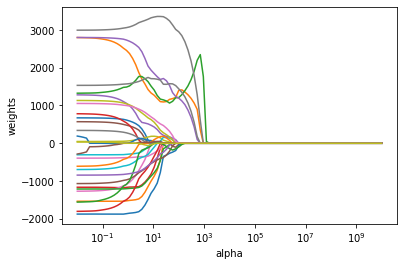

In [89]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

lasso = Lasso(max_iter = 100000, normalize = True)
coefs = []
#df = pd.concat([cars_lr,y])
df = cars_lr.dropna(how = 'any')

y = df.pop('price').to_frame()
X = df
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2)

train_means  = np.mean(X_train)
train_stdvs = np.std(X_train)

train_means  = np.mean(X_train)
train_stdvs = np.std(X_train)

alphas = 10**np.linspace(10,-2,100)*0.5

# first the base model
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(std_input(X_train, train_means,train_stdvs), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Regresie LASSO 

(<b>L</b>east <b>A</b>bsolute <b>S</b>hrinkage and <b>S</b>election <b>O</b>perator)

In [90]:
y_train.mean()

price    13658.664122
dtype: float64

In [91]:
basemodel = y_train.mean()
lasso.fit(std_input(X_train, train_means,train_stdvs), y_train)
base_model_error_train = ((y_train-basemodel)**2).sum()/X_train.shape[0]

print("Goodness of fit error -null model:", base_model_error_train)
base_model_error_test = ((y_test-basemodel)**2).sum()/X_test.shape[0]
print("Test error -null model:", base_model_error_test)
print('Magnitude comparison ', abs((base_model_error_train-base_model_error_test)/base_model_error_train))

Goodness of fit error -null model: price    6.513922e+07
dtype: float64
Test error -null model: price    3.874011e+07
dtype: float64
Magnitude comparison  price    0.405272
dtype: float64


Observați că în graficul coeficienților, în funcție de alegerea parametrului de reglare, unii dintre coeficienți sunt exact egali cu zero. Acum efectuăm o validare încrucișată de 10 ori pentru a alege cel mai bun alfa, pentru a remonta modelul și pentru a calcula eroarea de test asociată:

In [92]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(std_input(X_train, train_means,train_stdvs), y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(std_input(X_train, train_means,train_stdvs), y_train)
cv_alpha_train_error = mean_squared_error(y_train, lasso.predict(std_input(X_train, train_means,train_stdvs)))

print("Goodness of fit error -cv_alpha model:", cv_alpha_train_error)
cv_alpha_test_error = mean_squared_error(y_test, lasso.predict(std_input(X_test, train_means,train_stdvs)))

print("Test error -cv_alpha model:", cv_alpha_test_error)
print('Magnitude comparison ', abs((cv_alpha_train_error-cv_alpha_test_error)/cv_alpha_train_error))

Goodness of fit error -cv_alpha model: 3335281.5320283365
Test error -cv_alpha model: 3833331.21313791
Magnitude comparison  0.149327628365659


In [93]:
decrease_in_error = abs((cv_alpha_test_error-base_model_error_test)/base_model_error_test)
print('Percent error improvement (%diff in error from null model to best lasso model): ', 100*decrease_in_error,'%')

Percent error improvement (%diff in error from null model to best lasso model):  price    90.105006
dtype: float64 %


In [94]:
print('Feature coefficients: ')
for i in range(len(lasso.coef_)):
    
    print( dep_vars[i], ' - ', lasso.coef_[i])

Feature coefficients: 


NameError: name 'dep_vars' is not defined

### Reantrenare/remontare pe toate datele de antrenament

In [95]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(std_input(X, np.mean(X),np.std(X)), y)
cv_alpha_error_full = mean_squared_error(y, lasso.predict(std_input(X, np.mean(X),np.std(X))))
print("cv_alpha_error_full:", cv_alpha_error_full)

cv_alpha_error_full: 3439809.858394607


In [96]:
basemodel_full = y.mean()

base_model_error_full = ((y-basemodel_full)**2).sum()/X.shape[0]


print("Full error -null model:", base_model_error_full)
decrease_in_error = ((cv_alpha_error_full-base_model_error_full)/base_model_error_full)
print('Full model percent error improvement (%diff in error from null model to best lasso model): ',
      100*decrease_in_error,'%')

Full error -null model: price    5.963775e+07
dtype: float64
Full model percent error improvement (%diff in error from null model to best lasso model):  price   -94.232161
dtype: float64 %


In [97]:

coef = pd.Series(lasso.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Coefficient importance in the Lasso Model')

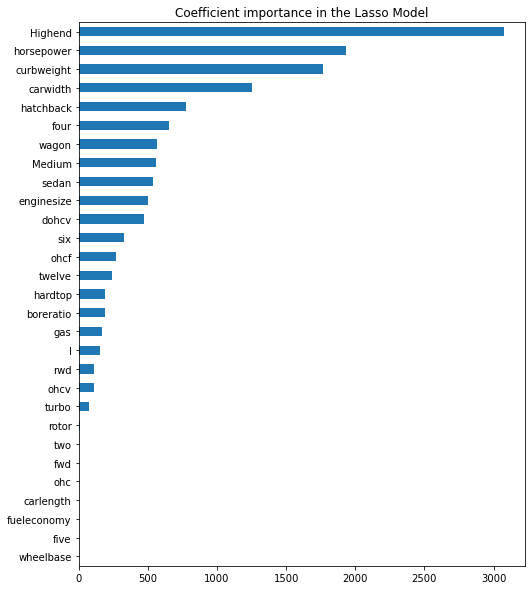

In [98]:
import matplotlib
# plotting feature importances!
imp_coef = abs(coef).sort_values()

# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficient importance in the Lasso Model")

# Exercitiu:
    
Determinati un model lasso regression pe setul de date boston housing. Listati cei mai importanti predictori precum si $R^2$ rezultat.